In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import warnings
from statsbombpy.api_client import NoAuthWarning
warnings.simplefilter('ignore', NoAuthWarning)
from socceraction.data.statsbomb import StatsBombLoader
import socceraction.spadl as spadl

api = StatsBombLoader(getter="remote", creds={"user": "", "passwd": ""})

g = 18240
team_id = 169
df_teams = api.teams(game_id=g)
df_players = api.players(game_id=g)
df_events = api.events(game_id=g)

df_actions = spadl.statsbomb.convert_to_actions(df_events, home_team_id=team_id)
df_actions = (
spadl
.add_names(df_actions)
.merge(api.teams(game_id=g))
.merge(api.players(game_id=g))
)
df_actions = df_actions.sort_values(by=['period_id', 'time_seconds'], ascending=[True, True]).reset_index(drop=True)

    nice_time    player_name             type_name    result_name    team_name
--  -----------  ----------------------  -----------  -------------  -----------------
 0  7m53s        David Olatukunbo Alaba  dribble      success        Bayern Munich
 1  7m54s        David Olatukunbo Alaba  pass         success        Bayern Munich
 2  7m55s        Franck Bilal Ribéry     dribble      success        Bayern Munich
 3  7m55s        Franck Bilal Ribéry     take_on      fail           Bayern Munich
 4  7m55s        Łukasz Piszczek         tackle       fail           Borussia Dortmund
 5  8m11s        David Olatukunbo Alaba  throw_in     fail           Bayern Munich
 6  8m17s        Mats Hummels            pass         success        Borussia Dortmund
 7  8m19s        Roman Weidenfeller      dribble      success        Borussia Dortmund
 8  8m20s        Roman Weidenfeller      pass         success        Borussia Dortmund
 9  8m23s        Kevin Großkreutz        pass         fail           Bo

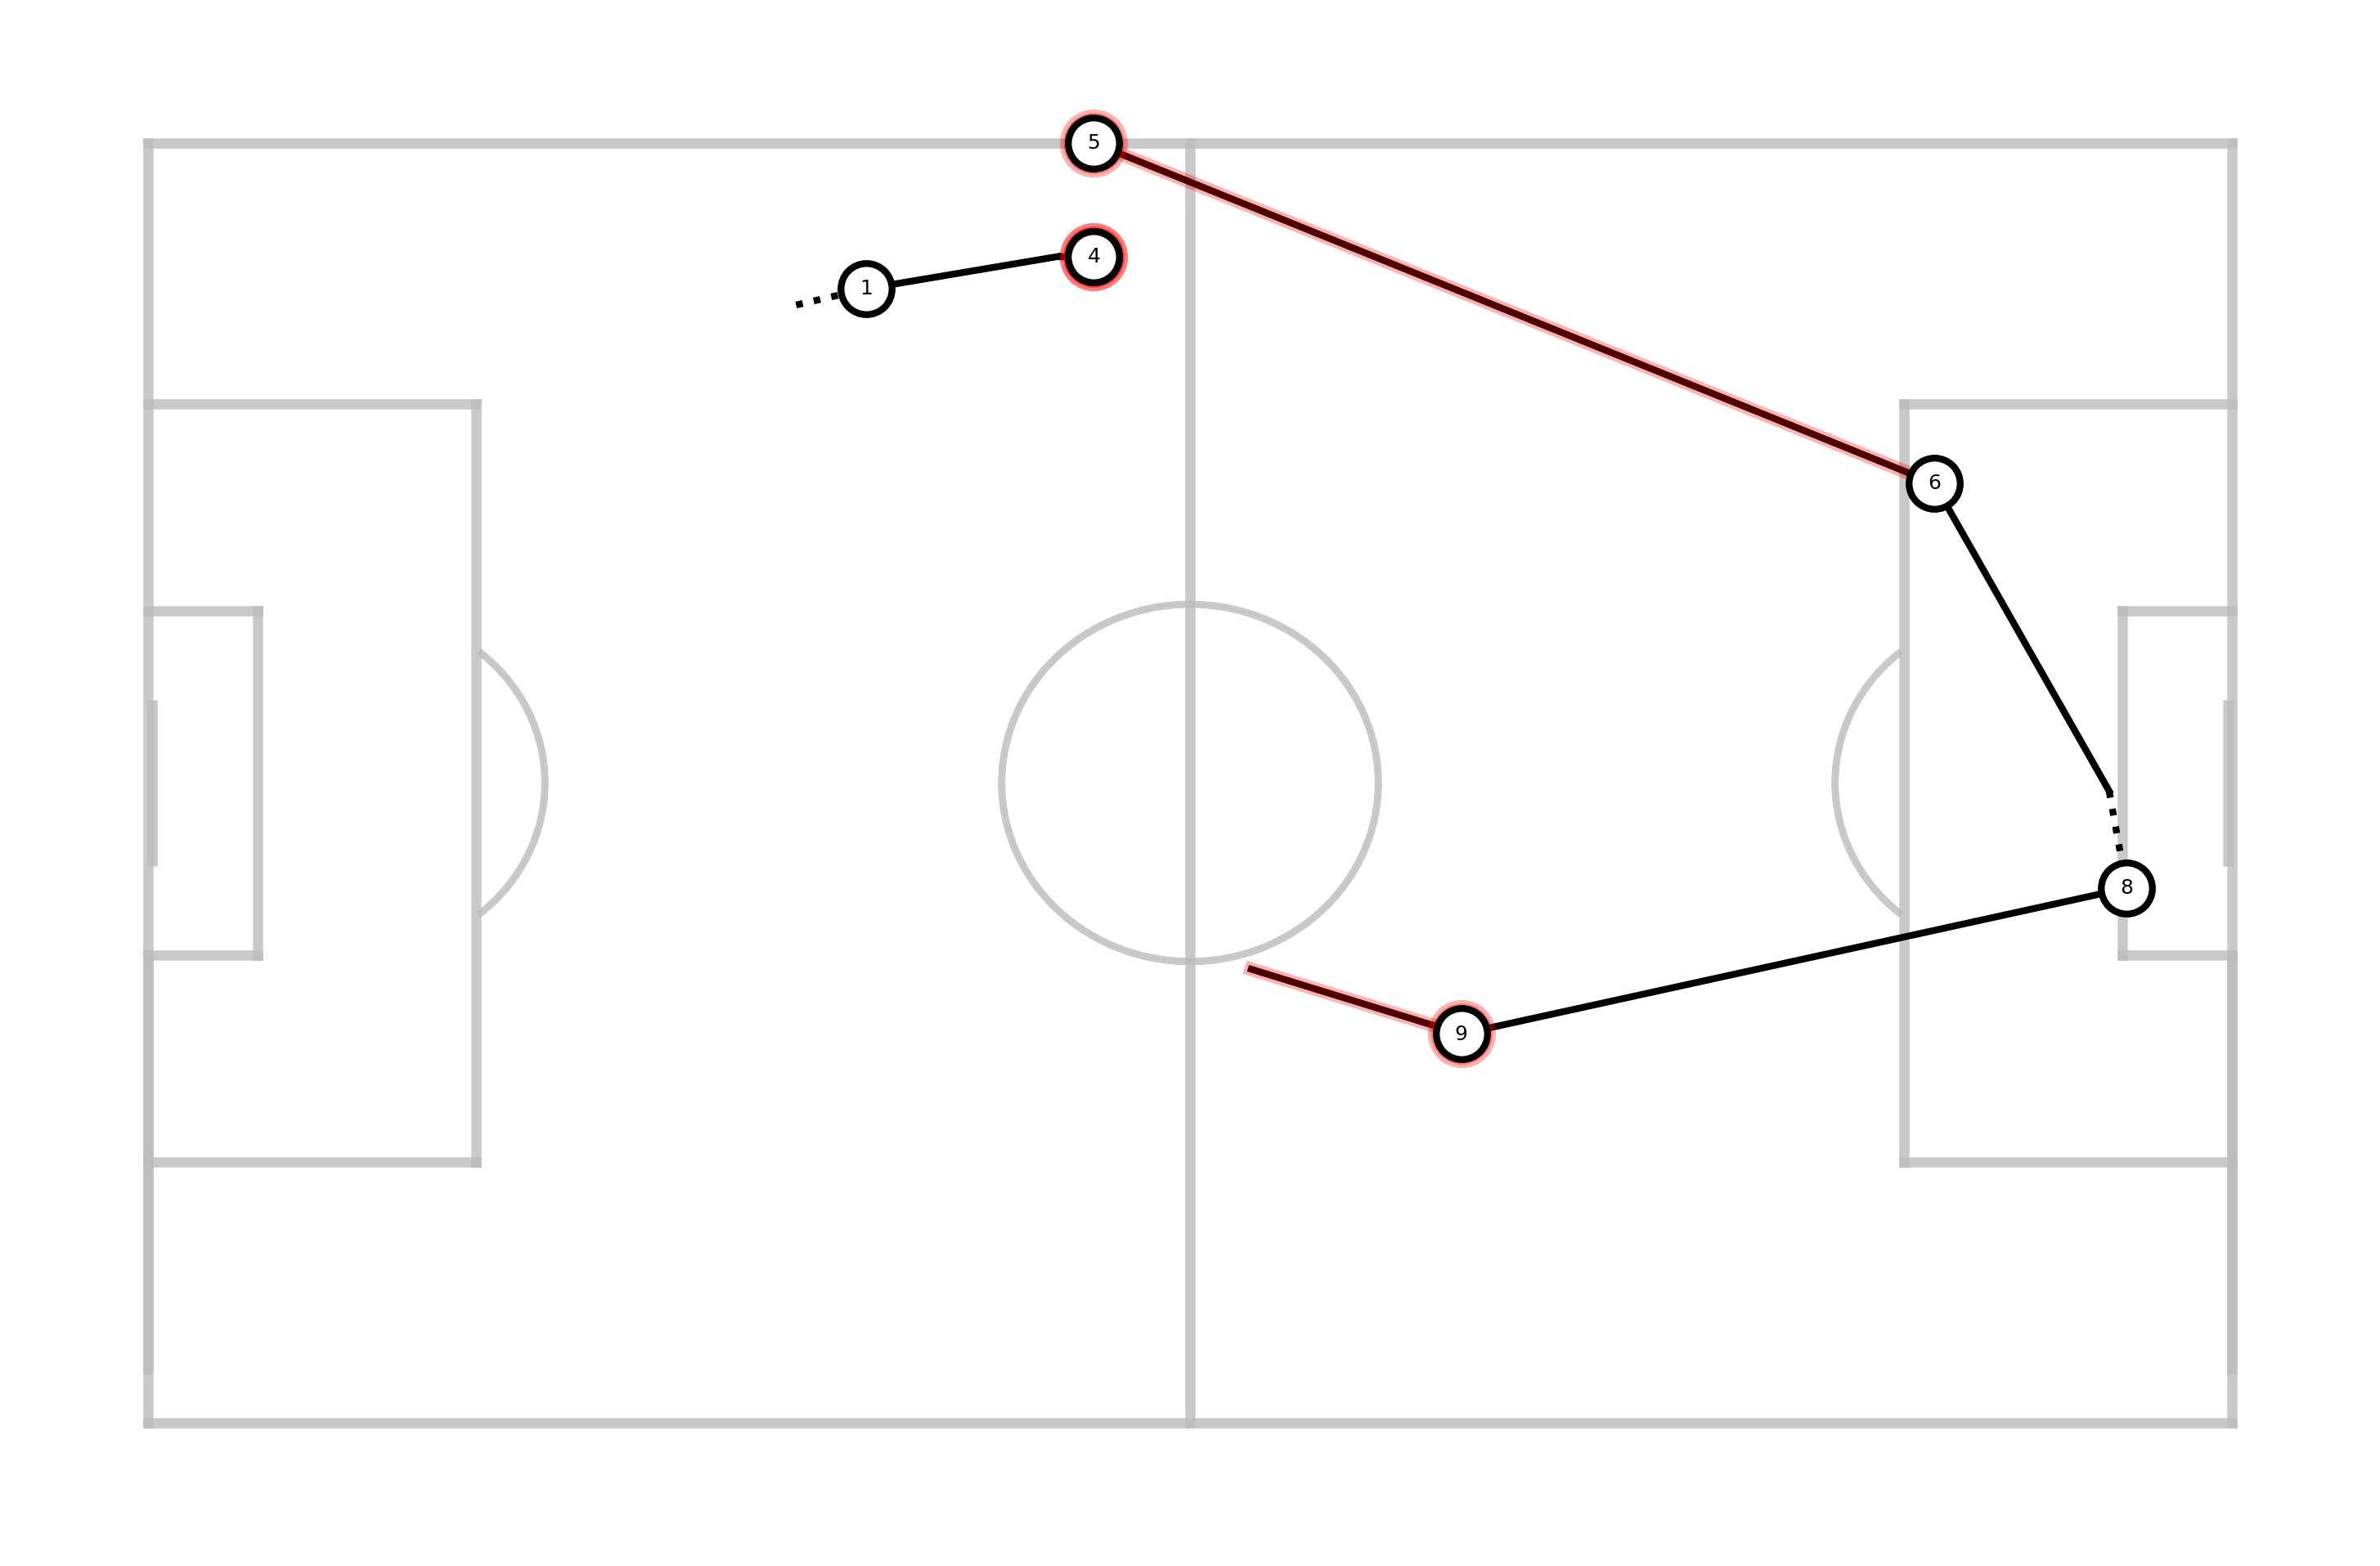

In [3]:
import statsbombplot as pys
from tabulate import tabulate

def nice_time(row):
    minute = int((row.period_id-1)*45 +row.time_seconds // 60)
    second = int(row.time_seconds % 60)
    return f"{minute}m{second}s"

def find_goal(df):
    df = df[(df['type_id'] == 11) & (df['result_id'] == 1)]
    return df.index

# goals = list(find_goal(df_actions))
# starting_id = goals[0]
# df = df_actions[starting_id - 9: starting_id + 1].copy()
df = df_actions[200:210].copy()
df = df.reset_index(drop=True)
df["nice_time"] = df.apply(nice_time, axis=1)
pys.draw_actions(df)
cols = ['nice_time', 'player_name', 'type_name', 'result_name', 'team_name']
print(tabulate(df[cols], headers = cols, showindex=True))